Constraints (c): [-1.29908528e+04 -2.94960000e+04 -1.70094180e+10 -2.49780480e-01]
Equality constraints (ceq): []


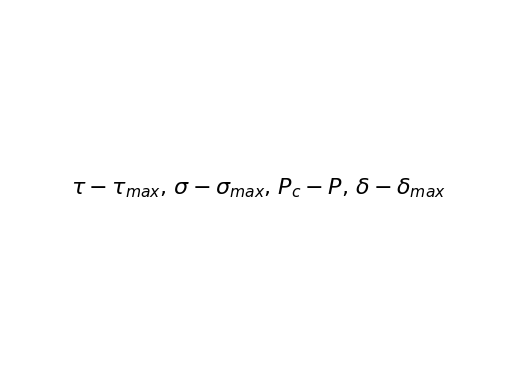

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def constraint_welded_beam(x):
    # Decompose the decision variables
    h = x[0]  # Thickness of the weld
    l = x[1]  # Length of the attached part of the beam
    t = x[2]  # Thickness of the beam
    b = x[3]  # Width of the beam

    # Constants and Parameters
    P = 6000  # Load in lbs
    L = 14  # Length of the beam in inches
    E = 30e6  # Modulus of elasticity in psi
    G = 12e6  # Shear modulus in psi

    # Derived Calculations
    Pc = (4.013 * E * np.sqrt((t**2 * b**6) / 36)) / (L**2) * (1 - t * L / (2 * np.pi) * np.sqrt(E / (4 * G)))
    M = P * (L + (l / 2))
    R = np.sqrt((l**2 / 4) + ((h + t)**2 / 4))
    J = 2 * (np.sqrt(2) * h * l * ((l**2 / 12) + ((h + t)**2 / 4)))

    # Calculating tau (shear stress), sigma (bending stress), delta (deflection)
    tau = (P / (np.sqrt(2) * h * l)) + ((M * R) / J)
    sigma = (6 * P * L) / (b * t**2)
    delta = (4 * P * L**3) / (E * b * t**3)

    # Constraints
    tau_max = 13600  # Maximum shear stress in psi
    sigma_max = 30000  # Maximum bending stress in psi
    delta_max = 0.25  # Maximum deflection in inches
    c = np.array([tau - tau_max, sigma - sigma_max, Pc - P, delta - delta_max])

    # No equality constraints in this problem
    ceq = []

    return c, ceq

# Example usage
x = [0.2, 100, 10, 10]  # Example decision variables
c, ceq = constraint_welded_beam(x)
print("Constraints (c):", c)
print("Equality constraints (ceq):", ceq)

# Plotting the mathematical formula
eqn = r"$\tau - \tau_{max}$, $\sigma - \sigma_{max}$, $P_c - P$, $\delta - \delta_{max}$"
plt.text(0.5, 0.5, eqn, fontsize=16, ha='center')
plt.axis('off')
plt.show()

Constraints (c): [-1.29908528e+04 -2.94960000e+04 -1.70094180e+10 -2.49780480e-01]


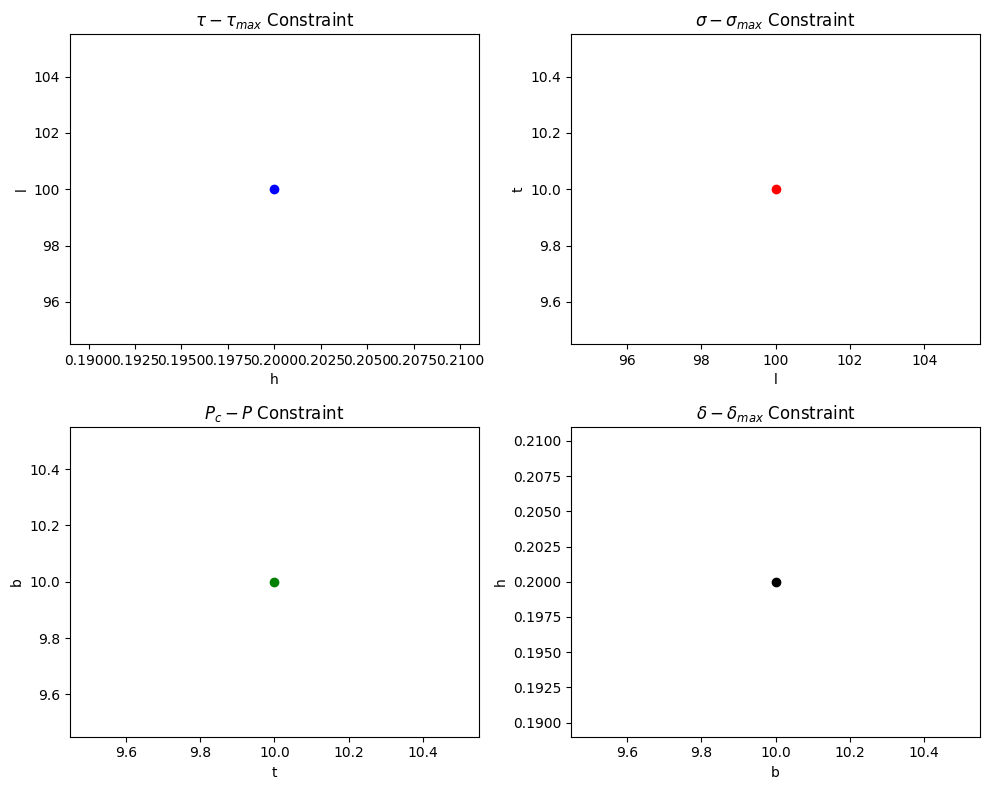

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def constraint_welded_beam(x):
    # Decompose the decision variables
    h = x[0]  # Thickness of the weld
    l = x[1]  # Length of the attached part of the beam
    t = x[2]  # Thickness of the beam
    b = x[3]  # Width of the beam

    # Constants and Parameters
    P = 6000  # Load in lbs
    L = 14  # Length of the beam in inches
    E = 30e6  # Modulus of elasticity in psi
    G = 12e6  # Shear modulus in psi

    # Derived Calculations
    Pc = (4.013 * E * np.sqrt((t**2 * b**6) / 36)) / (L**2) * (1 - t * L / (2 * np.pi) * np.sqrt(E / (4 * G)))
    M = P * (L + (l / 2))
    R = np.sqrt((l**2 / 4) + ((h + t)**2 / 4))
    J = 2 * (np.sqrt(2) * h * l * ((l**2 / 12) + ((h + t)**2 / 4)))

    # Calculating tau (shear stress), sigma (bending stress), delta (deflection)
    tau = (P / (np.sqrt(2) * h * l)) + ((M * R) / J)
    sigma = (6 * P * L) / (b * t**2)
    delta = (4 * P * L**3) / (E * b * t**3)

    # Constraints
    tau_max = 13600  # Maximum shear stress in psi
    sigma_max = 30000  # Maximum bending stress in psi
    delta_max = 0.25  # Maximum deflection in inches
    c = np.array([tau - tau_max, sigma - sigma_max, Pc - P, delta - delta_max])

    return c

# Example usage
x = [0.2, 100, 10, 10]  # Example decision variables
c = constraint_welded_beam(x)
print("Constraints (c):", c)

# Plotting the constraints
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Constraint 1: Tau - Tau_max
axs[0, 0].plot(x[0], x[1], 'bo')
axs[0, 0].set_xlabel('h')
axs[0, 0].set_ylabel('l')
axs[0, 0].set_title(r'$\tau - \tau_{max}$ Constraint')

# Constraint 2: Sigma - Sigma_max
axs[0, 1].plot(x[1], x[2], 'ro')
axs[0, 1].set_xlabel('l')
axs[0, 1].set_ylabel('t')
axs[0, 1].set_title(r'$\sigma - \sigma_{max}$ Constraint')

# Constraint 3: Pc - P
axs[1, 0].plot(x[2], x[3], 'go')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('b')
axs[1, 0].set_title(r'$P_c - P$ Constraint')

# Constraint 4: Delta - Delta_max
axs[1, 1].plot(x[3], x[0], 'ko')
axs[1, 1].set_xlabel('b')
axs[1, 1].set_ylabel('h')
axs[1, 1].set_title(r'$\delta - \delta_{max}$ Constraint')

plt.tight_layout()
plt.show()

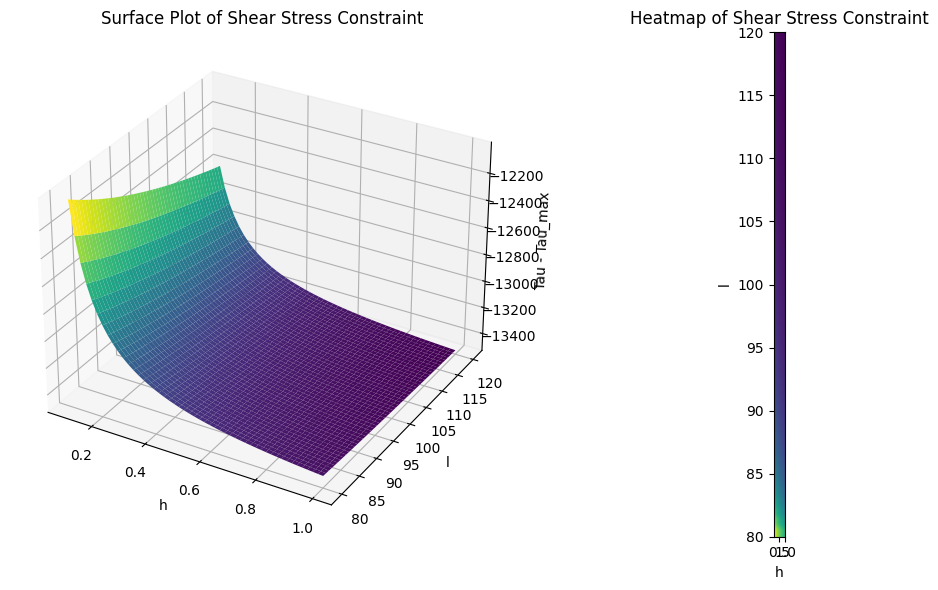

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def constraint_welded_beam(x):
    # Decompose the decision variables
    h = x[0]  # Thickness of the weld
    l = x[1]  # Length of the attached part of the beam
    t = x[2]  # Thickness of the beam
    b = x[3]  # Width of the beam

    # Constants and Parameters
    P = 6000  # Load in lbs
    L = 14  # Length of the beam in inches
    E = 30e6  # Modulus of elasticity in psi
    G = 12e6  # Shear modulus in psi

    # Derived Calculations
    Pc = (4.013 * E * np.sqrt((t**2 * b**6) / 36)) / (L**2) * (1 - t * L / (2 * np.pi) * np.sqrt(E / (4 * G)))
    M = P * (L + (l / 2))
    R = np.sqrt((l**2 / 4) + ((h + t)**2 / 4))
    J = 2 * (np.sqrt(2) * h * l * ((l**2 / 12) + ((h + t)**2 / 4)))

    # Calculating tau (shear stress), sigma (bending stress), delta (deflection)
    tau = (P / (np.sqrt(2) * h * l)) + ((M * R) / J)
    sigma = (6 * P * L) / (b * t**2)
    delta = (4 * P * L**3) / (E * b * t**3)

    # Constraints
    tau_max = 13600  # Maximum shear stress in psi
    sigma_max = 30000  # Maximum bending stress in psi
    delta_max = 0.25  # Maximum deflection in inches
    c = np.array([tau - tau_max, sigma - sigma_max, Pc - P, delta - delta_max])

    return c

# Generate data points with reduced grid resolution
h = np.linspace(0.1, 1, 50)
l = np.linspace(80, 120, 50)
t = np.linspace(5, 15, 50)
b = np.linspace(5, 15, 50)
H, L, T, B = np.meshgrid(h, l, t, b, indexing='ij')
C = constraint_welded_beam([H, L, T, B])

# Plotting the surface plot
fig = plt.figure(figsize=(12, 6))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(H[:,:,0,0], L[:,:,0,0], C[0][:,:,0,0], cmap='viridis')
ax1.set_xlabel('h')
ax1.set_ylabel('l')
ax1.set_zlabel('Tau - Tau_max')
ax1.set_title('Surface Plot of Shear Stress Constraint')

# Heatmap
ax2 = fig.add_subplot(122)
ax2.imshow(C[0][:,:,0,0], extent=(h.min(), h.max(), l.min(), l.max()), origin='lower', cmap='viridis')
ax2.set_xlabel('h')
ax2.set_ylabel('l')
ax2.set_title('Heatmap of Shear Stress Constraint')

plt.tight_layout()
plt.show()
